# Gradient Descent and Backpropagation
### Understanding the math behind gradient descent and how to implement backprogagation in python
--------------------
**Author: Jay Mody**

**Required Knowledge:**
- Basic Python Skills
- Numpy
- Calculus (derivatives, gradients, chain rule)
- Linear Algebra (matrices, matrix multiplication)

## Imports

In [1]:
#### Imports ####
import sys
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap 

## Tools

In [2]:
colors_list = ['red', 'cyan', 'magenta', 'green', 'black', 'blue']
colors = ListedColormap(colors_list)

def MSE(y, y_hat):
    return np.mean((y-y_hat)**2)

def generate_area_map(features, points_per_int = 10, alpha = 0.2):
    ###  Area Map Set  ###
    xstart = int((features[:, 0].min() - 1) * points_per_int) # min start point of the x data
    xrang = int((features[:, 0].max() + 1) * points_per_int - xstart) # range of the data on x

    ystart = int((features[:, 1].min()  - 1) * points_per_int) # min start poing of the y data
    yrang = int((features[:, 1].max() + 1) * points_per_int - ystart) # range of teh data on y

    # Creates an array with all the coordinates of area map set
    area_map_set = np.array([[x + xstart, y + ystart] for x in range(xrang) for y in range(yrang)])
    area_map_set = area_map_set / points_per_int
    
    return area_map_set

def area_map_plot(network, area_map_set, features, targets, path = '', alpha = 0.1):
    # gets the prediction the model made for the area map set
    pred = network.predict(area_map_set)
    pred = [pred[i,:].argmax() for i in range(int(pred.shape[0]))]

    # draws the current area map and the test set overtop it, saves the scatter
    plt.scatter(features[:, 0], features[:, 1], c = targets, cmap =colors)
    plt.scatter(area_map_set[:, 0], area_map_set[:, 1], c = pred, alpha = alpha, cmap = colors)
    
    if path == '':
        plt.show()
    else:
        plt.savefig(path)
        plt.close()

## Data

In [3]:
from Data import mnistData
from Data import clusterData

## Data Params ##
n_features = 2
n_classes = 3 
n_training_samples = 400
n_testing_samples = 200
cluster_std = 0.15
center_box = (-2,2)
seed = 0

## Data ##
data = clusterData(n_features, n_classes, n_training_samples, 
                   n_testing_samples, cluster_std, center_box, seed)

x_train, y_train, y_train_raw = data.trainData()
x_test, y_test, y_test_raw = data.testData()

### Visualizing Datasets

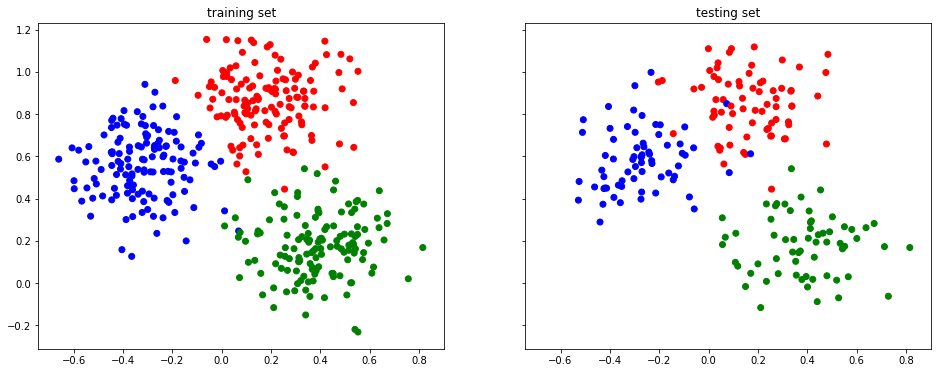

In [4]:
fig, (ax1, ax2) = plt.subplots(1, 2, sharey = True, sharex = True, figsize=(16, 6))

_ = ax1.scatter(x_train[:, 0], x_train[:, 1], c = y_train_raw, cmap = colors)
_ = ax1.set_title('training set')

_ = ax2.scatter(x_test[:, 0], x_test[:, 1], c = y_test_raw, cmap = colors)
_ = ax2.set_title('testing set')

## Network and Parameters

In [9]:
from NeuralNetwork import MLP

## Network Parameters ##
n_input_nodes = n_features
n_output_nodes = n_classes
n_hidden_nodes = [64, 32]
lr = 0.01

## Neural Network ##
network = MLP(n_input_nodes, n_hidden_nodes, n_output_nodes, lr)

### Control Test

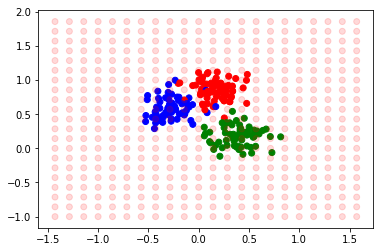

Accuracy on Train Set: 0.3325
Accuracy on Test Set: 0.31


In [10]:
area_map_set = generate_area_map(x_test, points_per_int = 7)
area_map_plot(network, area_map_set, x_test, y_test_raw, alpha = 0.15)
    
print("Accuracy on Train Set:", network.test(x_train, y_train))
print("Accuracy on Test Set:", network.test(x_test, y_test))

## Train

In [11]:
## Training Params ##
n_epochs = 10000
batch_size = 16 # set to 1 for SGD 

## Tracking loss and accuracy ##
losses = {'train':[], 'validation':[]}
accuracy = {'train':[], 'validation':[]}

## Training Algorithim ##
for epoch in range(n_epochs):
    batch_indices = np.random.choice(list(range(x_train.shape[0])), size = batch_size)
    features = np.array([x_train[i] for i in batch_indices])
    targets = np.array([y_train[i] for i in batch_indices])

    network.train(features, targets)

    # Printing out the training progress
    train_loss = MSE(network.predict(x_train).T, y_train_raw)
    val_loss = MSE(network.predict(x_test).T, y_test_raw)
    train_acc = network.test(x_train, y_train)
    val_acc = network.test(x_train, y_train)
    sys.stdout.write("\rProgress: {:2.1f}%".format(100 * epoch/float(n_epochs)) \
                     + " ... Training loss: " + str(train_loss)[:5] \
                     + " ... Validation loss: " + str(val_loss)[:5] \
                     + " ... Training Acc: " + str(train_acc)[:5] \
                     + " ... Validation Acc: " + str(val_acc)[:5])
    sys.stdout.flush()

    losses['train'].append(train_loss)
    losses['validation'].append(val_loss)
    accuracy['train'].append(train_acc)
    accuracy['validation'].append(val_acc)

Progress: 100.0% ... Training loss: 1.101 ... Validation loss: 1.098 ... Training Acc: 0.97 ... Validation Acc: 0.9765

### Loss Graph

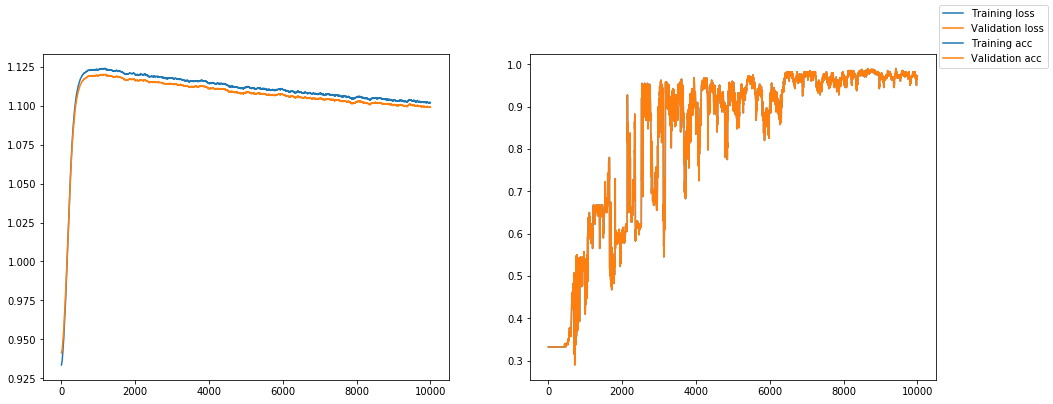

In [12]:
fig, (ax1, ax2) = plt.subplots(1, 2, sharey = False, sharex = False, figsize=(16, 6))

_ = ax1.plot(losses['train'], label='Training loss')
_ = ax1.plot(losses['validation'], label='Validation loss')

_ = ax2.plot(accuracy['train'], label='Training acc')
_ = ax2.plot(accuracy['validation'], label='Validation acc')

_ = fig.legend()

## Testing

Accuracy on Train Set: 0.97
Accuracy on Test Set: 0.935


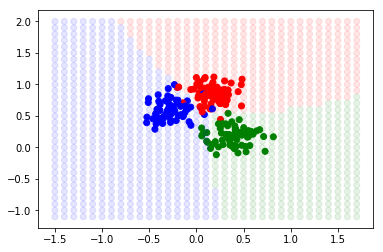

In [13]:
print("Accuracy on Train Set:", network.test(x_train, y_train))
print("Accuracy on Test Set:", network.test(x_test, y_test))

area_map_set = generate_area_map(x_test)
area_map_plot(network, area_map_set, x_test, y_test_raw)

In [ ]:
#### END OF NOTEBOOK ####